# Task
Build and train a Convolutional Neural Network (CNN) on the Fashion-MNIST dataset. Evaluate the trained model’s performance using classification metrics. Load the dataset using `from tensorflow.keras.datasets import fashion_mnist`. Preprocess the data by normalizing pixel values to range [0,1], reshaping input to (28, 28, 1) for CNN layers, and one-hot encoding labels. Build a simple CNN with at least one Convolutional layer, at least one MaxPooling layer, and Dense layers with softmax output (10 classes). Compile the model with an appropriate optimizer and loss function. Train the model on the training set and validate on the test set. Evaluate the model using accuracy and confusion matrix. Provide short explanations in the notebook for each step.

## Load the fashion-mnist dataset

### Subtask:
Load the dataset from `tensorflow.keras.datasets`.


**Reasoning**:
Import the fashion_mnist dataset and load the training and testing data into variables.



In [2]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Preprocess the data

### Subtask:
Preprocess the data by normalizing pixel values to range [0,1], reshaping input to (28, 28, 1) for CNN layers, and one-hot encoding labels.


**Reasoning**:
Preprocess the image data by normalizing pixel values and reshaping for CNN input, and then preprocess the labels by one-hot encoding.



In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Build a simple cnn

### Subtask:
Define a sequential model, add convolutional layers with activation functions, add pooling layers, flatten the output of the convolutional layers, add dense layers with activation functions, and add a dense output layer with softmax activation for 10 classes.


**Reasoning**:
Import the necessary Keras modules and define the sequential CNN model based on the instructions.



In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

### Subtask:
Compile the model with an appropriate optimizer (e.g., Adam) and loss function (e.g., categorical crossentropy).


**Reasoning**:
Compile the defined CNN model with the specified optimizer, loss function, and metrics.



In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

### Subtask:
Train the model on the training data and validate on the test data for a specified number of epochs.


**Reasoning**:
Train the compiled model using the training and test data for a specified number of epochs and store the training history.



In [6]:
epochs = 10
history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 30ms/step - accuracy: 0.7735 - loss: 0.6272 - val_accuracy: 0.8743 - val_loss: 0.3590
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.8856 - loss: 0.3133 - val_accuracy: 0.8847 - val_loss: 0.3177
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.9049 - loss: 0.2577 - val_accuracy: 0.8984 - val_loss: 0.2756
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9163 - loss: 0.2261 - val_accuracy: 0.8982 - val_loss: 0.2731
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9249 - loss: 0.1991 - val_accuracy: 0.9077 - val_loss: 0.2550
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 31ms/step - accuracy: 0.9366 - loss: 0.1714 - val_accuracy: 0.8922 - val_loss: 0.3001
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9438 - loss: 0.1491 - val_accuracy: 0.9048 - val_loss: 0.2797
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.9501 -

## Check Accuracy

### Subtask:
Test the accuracy of the model

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print("Test Accuracy:", test_acc)

Test Accuracy: 0.9154999852180481


## Visualize Training History

### Subtask:
Plot the training and validation accuracy at each epoch.

**Reasoning**:
Plot the training and validation accuracy over epochs using the history object returned by the `model.fit()` method.

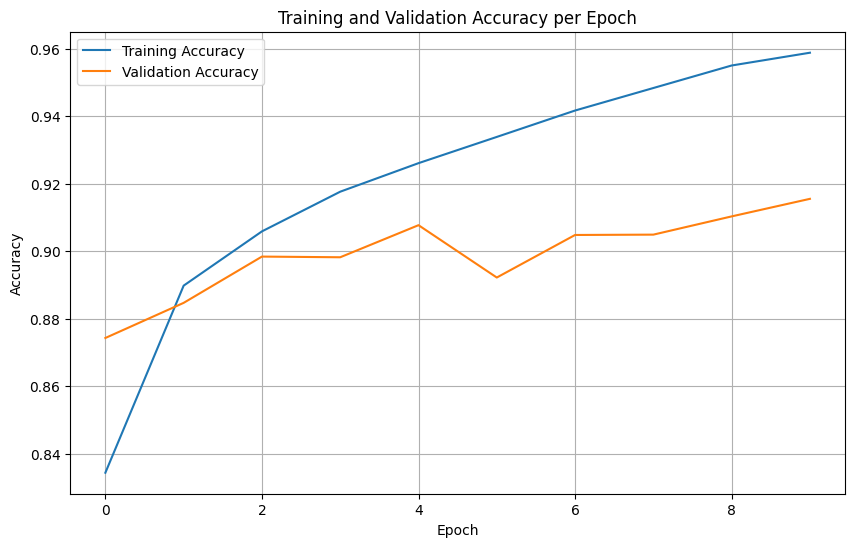

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()

## Evaluate the model

### Subtask:
Evaluate the model using accuracy and confusion matrix.

**Reasoning**:
Calculate the confusion matrix using the true labels and the model's predictions to evaluate the classification performance.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


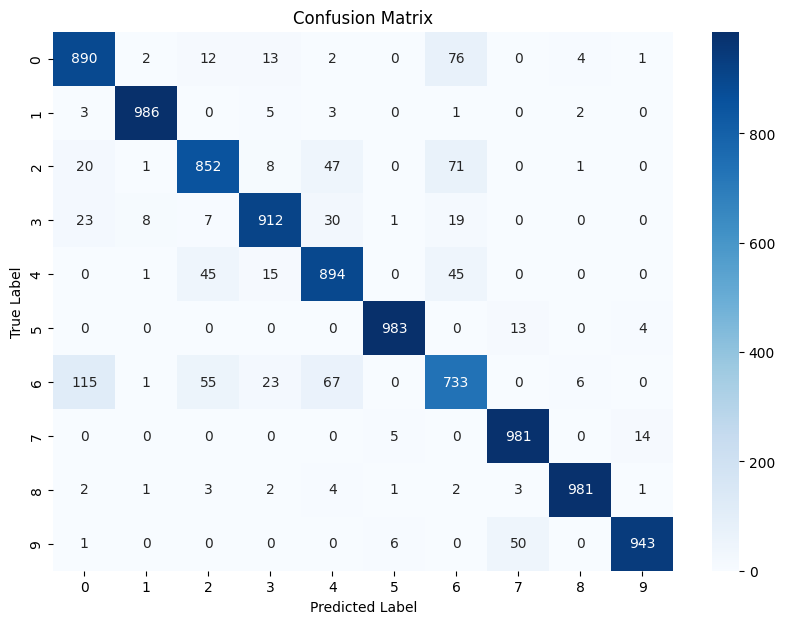

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions for the test set
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels (converting back from one-hot encoding if necessary)
# Assuming test_labels are one-hot encoded, we need to convert them back to class indices
test_labels_classes = np.argmax(test_labels, axis=1)


# Calculate the confusion matrix
cm = confusion_matrix(test_labels_classes, y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()